# Deeplearning 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Gradient Descent: changing the learning rate $\eta$

In [2]:
np.random.seed(42)

# Run the next 4 cells
# N points randomly drawn from a linear distribution
N = 100
X = 2 * np.random.rand(N, 1)
y = 4 + 3 * X + np.random.randn(N, 1)

# Turn X into a matrix
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each 

# Grid for plotting
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

In [3]:
eta = 0.1  # learning rate
n_iterations = 100
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/N * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
n_lines=10
color_idx = np.linspace(0, 1, n_lines)

# Helper function
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, color=plt.cm.cool(color_idx[iteration]))
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
            
    #plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

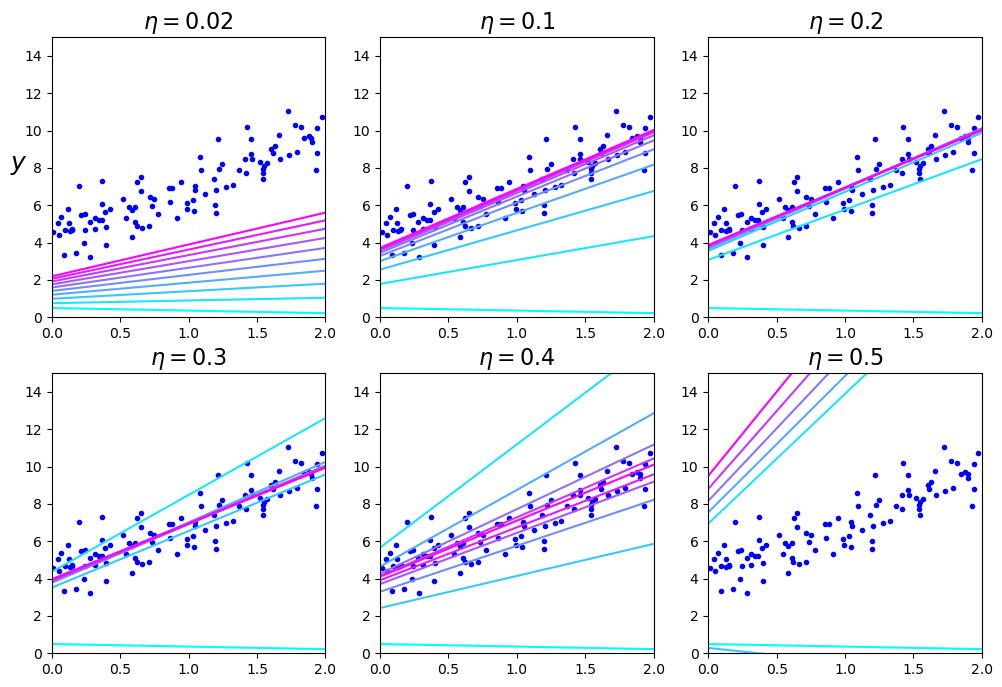

In [13]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
plt.figure(figsize=(12,8))

plt.subplot(231); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.subplot(232); plot_gradient_descent(theta, eta=0.1, 
                                        theta_path=theta_path_bgd)
plt.subplot(233); plot_gradient_descent(theta, eta=0.2)

plt.subplot(234); plot_gradient_descent(theta, eta=0.3)

plt.subplot(235); plot_gradient_descent(theta, eta=0.4)

plt.subplot(236); plot_gradient_descent(theta, eta=0.5)

plt.show()

It seems like the steps move towards the points for $\eta<0.2$, then they make some steps too long and overpass the data points ($\eta<0.5$). For $\eta<0.5$ the algorithm still converges, while for higher steps ($\eta>0.5$) it falls into another well. 

### AdaBoost

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
#Helper function for plotting
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, 
                           axes=[-1.5, 2.45, -1, 1.5], 
                           alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

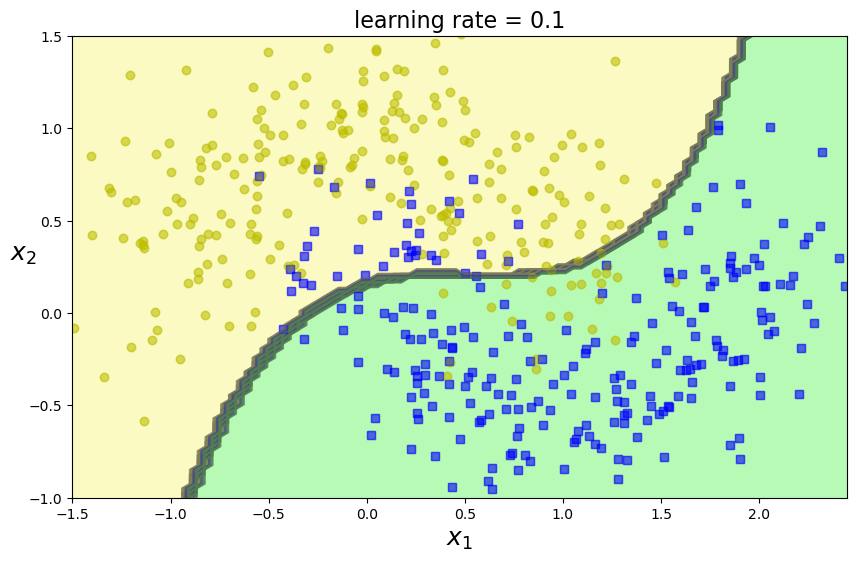

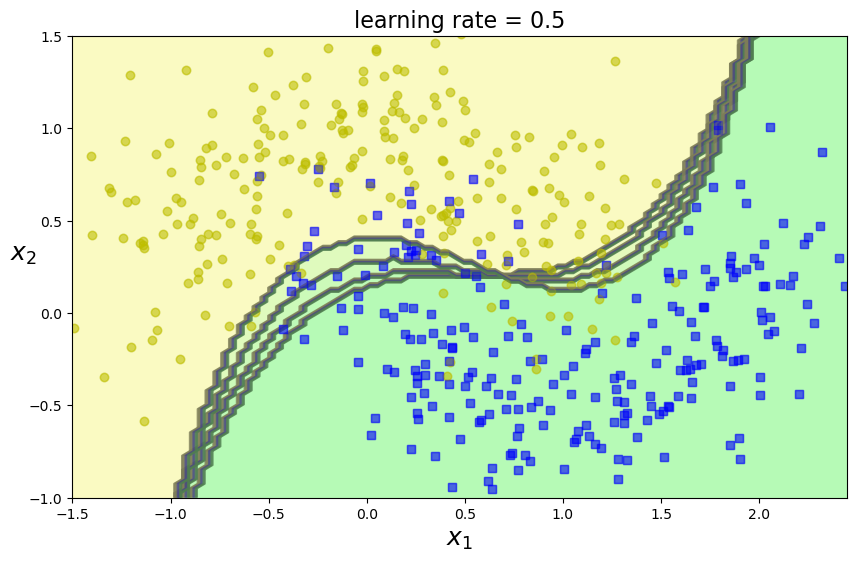

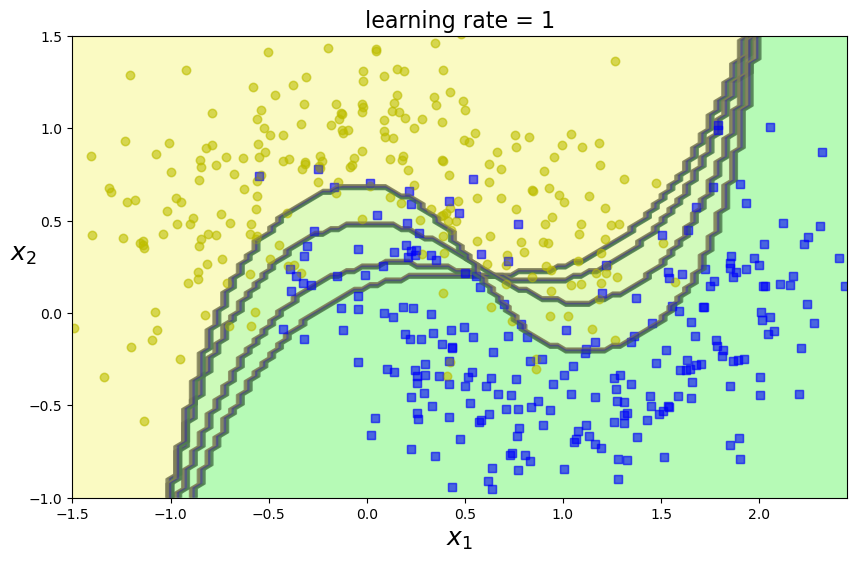

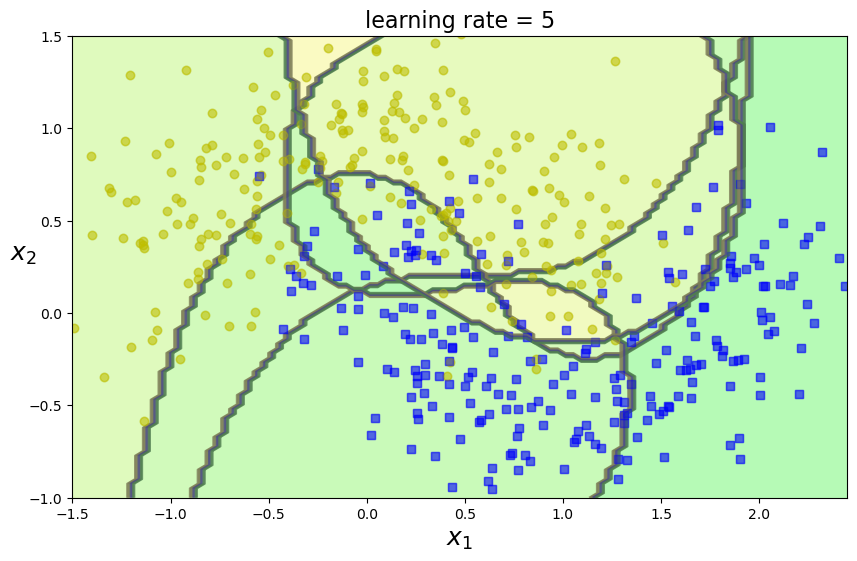

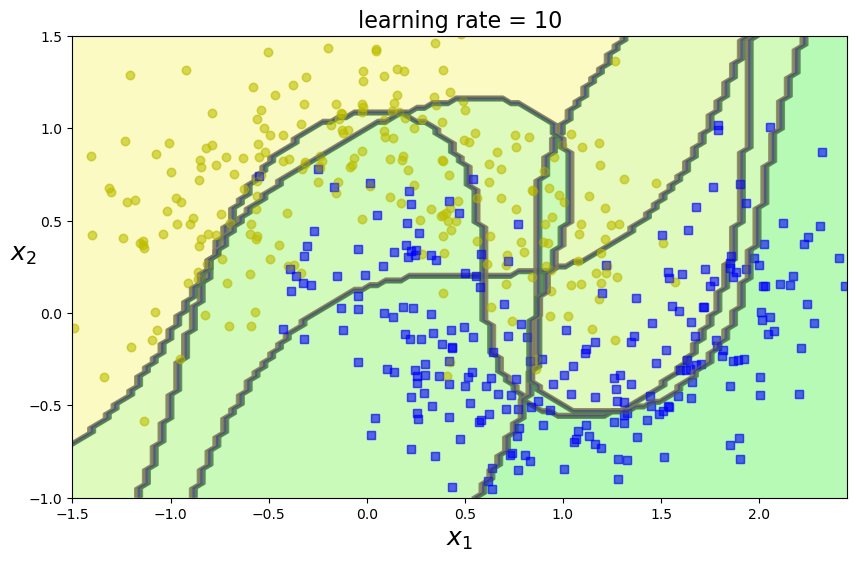

In [24]:
from sklearn.svm import SVC

learning_rate = [0.1, 0.5, 1, 5, 10]
m = len(X_train)

for j, lr in enumerate(learning_rate):
    fix, axes = plt.subplots(ncols=1, figsize=(10,6))
    sample_weights = np.ones(m)
    for i in range(4):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)

        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + lr)

        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning rate = {}".format(lr), fontsize=16)

    plt.show()


## Tensorflow 

### First dataset

![](TF1_best.png)

| learning rate | activation | regularization | reg rate | n° features | n° neurons | loss function |
|---------------|------------|----------------|----------|-------------|------------|---------------|
|      0.01     |   Linear   |       L2       |   0.001  |      2      |      5     |     0.510     |
|      0.01     |   Tanh     |       L2       |   0.001  |      2      |      5     |     0.194     |
|      0.01     |   Sigmoid  |       L2       |   0.001  |      2      |      5     |     0.186     |
|      0.01     |   ReLU     |       L2       |   0.001  |      2      |      5     |     0.158     |

Here we change the activation function: ReLU clearly produces the lowest loss function, while the worst is a linear activation. Therefore, from now on we take into account ReLU function. 

| learning rate | activation | regularization | reg rate | n° features | n° neurons | loss function |
|---------------|------------|----------------|----------|-------------|------------|---------------|
|      0.01     |   ReLU     |       L2       |   0.001  |      2      |      3     |     0.182     |
|      0.01     |   ReLU     |       L2       |   0.001  |      2      |      4     |     0.174     |
|      0.01     |   ReLU     |       L2       |   0.001  |      2      |      5     |     0.156     |

The number of neurons is optimal if $\geq 5$. For this problem, the number of hidden layers doesn't improve the performance of the classification.

| learning rate | activation | regularization | reg rate | n° features | n° neurons | loss function |
|---------------|------------|----------------|----------|-------------|------------|---------------|
|      0.001    |   ReLU     |       L2       |   0.001  |      2      |      5     |     slow conv |
|      0.01     |   ReLU     |       L2       |   0.001  |      2      |      5     |     0.158     |
|      0.1      |   ReLU     |       L2       |   0.001  |      2      |      5     |     0.174     |
|      1        |   ReLU     |       L2       |   0.001  |      2      |      5     |     no conv   |

Small learning rate slow down the convergence of the loss test function. Instead, high values produce "jumps" of the loss function and no convergence al all. 

| learning rate | activation | regularization | reg rate | n° features | n° neurons | loss function |
|---------------|------------|----------------|----------|-------------|------------|---------------|
|      0.01     |   ReLU     |       L2       |   0.001  |      2      |      5     |    0.158      |
|      0.01     |   ReLU     |       L1       |   0.001  |      2      |      5     |    0.155      |
|      0.01     |   ReLU     |       None     |   -      |      2      |      5     |    0.161      |

The loss function is not significantly affected by the change of the regularization, at least for this problem. Neither we notice any difference as we try different values of the regularization rate. 

### Second dataset

![](TF2_best.png)

| learning rate | activation | regularization | reg rate | n° features | n° neurons / layer | n° hidden layers | loss function |
|---------------|------------|----------------|----------|-------------|--------------------|------------------|---------------|
|      0.01     |   ReLU     |       None     |   -      |      7      |      8             |       2          |    0.077      |
|      0.01     |   ReLU     |       None     |   -      |      7      |      7             |       2          |    0.232      |
|      0.01     |   ReLU     |       None     |   -      |      7      |      6             |       2          |    0.217      |
|      0.01     |   ReLU     |       None     |   -      |      7      |      8             |       1          |    0.136      |
|      0.01     |   ReLU     |       None     |   -      |      7      |      8             |       3          |    0.191      |

We need all the 7 available features to classify this dataset. 

Therefore, we try the maximum number of neurons (8) in a single hidden layer, obtaining the result show in the table above. To make it better, we add a second layer and vary the number of neurons: the best result (minimum loss function) is the one with 8 neurons per layer.

3 hidden layers are too much, and we observe overfitting effects.

| learning rate | activation | regularization | reg rate | n° features | n° neurons / layer | n° hidden layers | loss function |
|---------------|------------|----------------|----------|-------------|--------------------|------------------|---------------|
|      0.01     |   ReLU     |       None     |   -      |      7      |      8             |       2          |    0.077      |
|      0.01     |   ReLU     |       L2       |   0.003  |      7      |      8             |       2          |    0.086      |
|      0.01     |   ReLU     |       L1       |   0.003  |      7      |      8             |       2          |    0.201      |

Different activation functions result in high loss functions, showing that the best activation for this classification problem is again ReLU. My best result is shown in the picture above.